#### CLEANING OF DATA 

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv("Real Estate.csv")

In [3]:
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
No,414.0,207.500000,119.655756,1.00000,104.250000,207.50000,310.750000,414.00000
X1 transaction date,414.0,2013.148971,0.281967,2012.66700,2012.917000,2013.16700,2013.417000,2013.58300
X2 house age,414.0,17.712560,11.392485,0.00000,9.025000,16.10000,28.150000,43.80000
X3 distance to the nearest MRT station,414.0,1083.885689,1262.109595,23.38284,289.324800,492.23130,1454.279000,6488.02100
X4 number of convenience stores,414.0,4.094203,2.945562,0.00000,1.000000,4.00000,6.000000,10.00000
X5 latitude,414.0,24.969030,0.012410,24.93207,24.963000,24.97110,24.977455,25.01459
X6 longitude,414.0,121.533361,0.015347,121.47353,121.528085,121.53863,121.543305,121.56627
Y house price of unit area,414.0,37.980193,13.606488,7.60000,27.700000,38.45000,46.600000,117.50000


In [6]:
columns = df.columns

In [7]:
columns

Index(['No', 'X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude',
       'Y house price of unit area'],
      dtype='object')

In [8]:
schema = {
    "No" : "no",
    "X1 transaction date" : "tran-date",
    "X2 house age" : "age",
    "X3 distance to the nearest MRT station": "dist-station",
    "X4 number of convenience stores": "conv-stores",
    "X5 latitude": "lat",
    "X6 longitude": "long",
    "Y house price of unit area": "house-price"
}

In [9]:
df = df.rename(columns = schema)


In [10]:
df.head()

,no,tran-date,age,dist-station,conv-stores,lat,long,house-price
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [12]:
target = df["house-price"]
data = df.drop(["no", "house-price"], axis = 1)

In [13]:
data

,tran-date,age,dist-station,conv-stores,lat,long
0,2012.917,32.0,84.87882,10,24.98298,121.54024
1,2012.917,19.5,306.59470,9,24.98034,121.53951
2,2013.583,13.3,561.98450,5,24.98746,121.54391
3,2013.500,13.3,561.98450,5,24.98746,121.54391
4,2012.833,5.0,390.56840,5,24.97937,121.54245
...,...,...,...,...,...,...
409,2013.000,13.7,4082.01500,0,24.94155,121.50381
410,2012.667,5.6,90.45606,9,24.97433,121.54310
411,2013.250,18.8,390.96960,7,24.97923,121.53986
412,2013.000,8.1,104.81010,5,24.96674,121.54067


In [14]:
target

0      37.9
1      42.2
2      47.3
3      54.8
4      43.1
       ... 
409    15.4
410    50.0
411    40.6
412    52.5
413    63.9
Name: house-price, Length: 414, dtype: float64

In [15]:
data = data.to_numpy()
target = target.to_numpy()

In [16]:
data

array([[2012.917  ,   32.     ,   84.87882,   10.     ,   24.98298,
         121.54024],
       [2012.917  ,   19.5    ,  306.5947 ,    9.     ,   24.98034,
         121.53951],
       [2013.583  ,   13.3    ,  561.9845 ,    5.     ,   24.98746,
         121.54391],
       ...,
       [2013.25   ,   18.8    ,  390.9696 ,    7.     ,   24.97923,
         121.53986],
       [2013.     ,    8.1    ,  104.8101 ,    5.     ,   24.96674,
         121.54067],
       [2013.5    ,    6.5    ,   90.45606,    9.     ,   24.97433,
         121.5431 ]])

#### DATA VISUALIZATION

In [19]:
import matplotlib.pyplot as plt

In [20]:
data.shape

(414, 6)

In [21]:
target.shape

(414,)

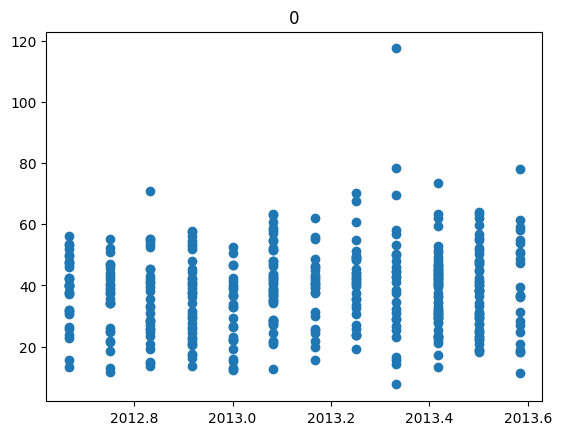

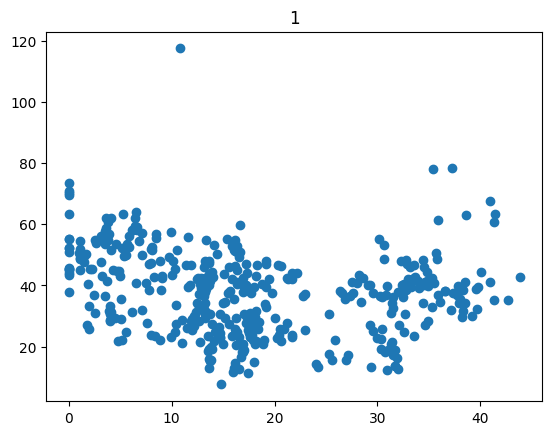

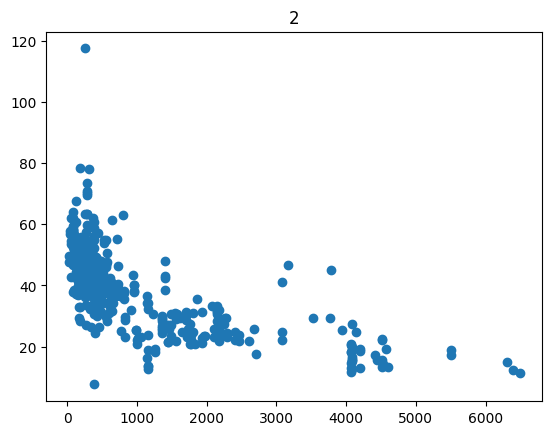

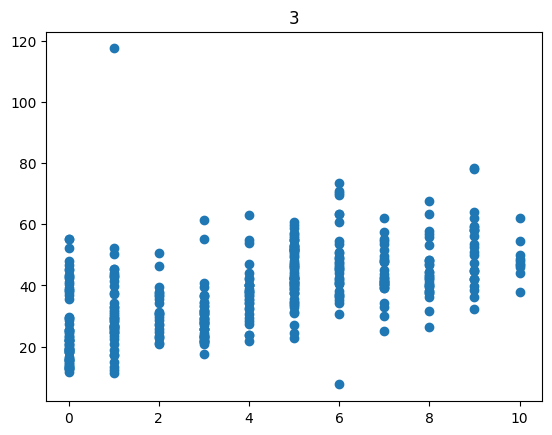

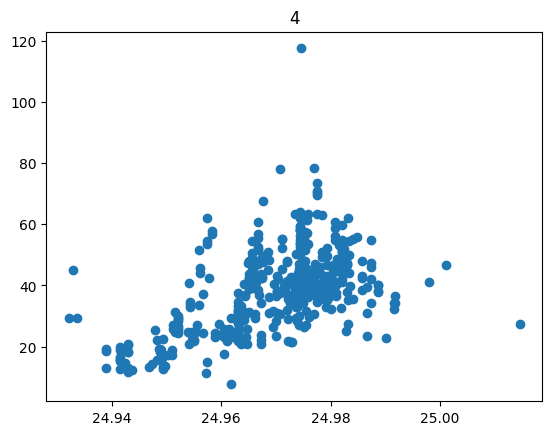

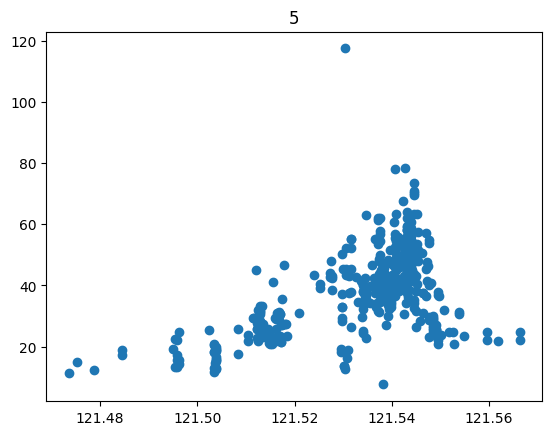

In [24]:
for x in range(data.shape[1]):
    plt.title(f"{x}")
    plt.scatter(data[:, x], target)
    plt.show()

#### MODEL

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split as TTS

In [26]:
lin_regressor = LinearRegression()

In [28]:
train_data, test_data, train_labels, test_labels = TTS(data, target, train_size = 0.8, shuffle = True)

In [30]:
print(f"train_data shape => {train_data.shape}")
print(f"test_data shape => {test_data.shape}")
print(f"train_target shape => {train_labels.shape}")
print(f"test_target shape => {test_labels.shape}")


train_data shape => (331, 6)
test_data shape => (83, 6)
train_target shape => (331,)
test_target shape => (83,)


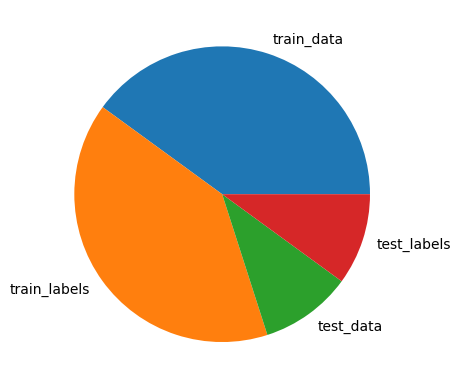

In [36]:
labels = "train_data,train_labels,test_data,test_labels".split(",")
plt.pie([train_data.shape[0],train_labels.shape[0],test_data.shape[0],test_labels.shape[0]], labels = labels)
plt.show()

In [37]:
lin_regressor.fit(train_data, train_labels)

LinearRegression()

In [39]:
lin_regressor.score(train_data, train_labels)

0.6065376614672355

In [38]:
prediction = lin_regressor.predict(test_data)

#### MODEL EVALUATION

In [40]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

mae = mean_absolute_error(y_true = test_labels, y_pred = prediction)
mse = mean_squared_error(y_true = test_labels, y_pred = prediction) 
rmse = mean_squared_error(y_true = test_labels, y_pred = prediction, squared = False)

print("MAE:",mae)
print("MSE:",mse)
print("RMSE:",rmse)


MAE: 6.875754266458206
MSE: 90.65532373046815
RMSE: 9.521308929473308
